In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

Cloning repository and installing necesssary libraries

In [42]:
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [43]:
!pip install ultralytics

In [5]:
!pip3 install -qr /kaggle/working/ultralytics/requirements.txt

In [6]:
import torch
import torch.nn as nn
import torch.nn.parallel as parallel
import torch.optim as optim
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import argparse
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn

In [7]:
!pip3 install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.7.0
    Uninstalling PyJWT-2.7.0:
      Successfully uninstalled PyJWT-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.621.222118 requires jupyter-server~=1.16, but you have jupyter-server 2.6.0 which is incompatible.


In [13]:
from os import mkdir
os.makedirs('/kaggle/working/train')
os.makedirs('/kaggle/working/val')

In [14]:
import os
import shutil

source_folder = "/kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/train/images"
destination_folder = "/kaggle/working/train"

# Get the list of files in the source folder
file_list = os.listdir(source_folder)

for filename in file_list:
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)

In [15]:
source_folder = "/kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/train/labels"
destination_folder = "/kaggle/working/train"

# Get the list of files in the source folder
file_list = os.listdir(source_folder)

for filename in file_list:
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)

In [16]:
source_folder = "//kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/valid/images"
destination_folder = "/kaggle/working/val"

# Get the list of files in the source folder
file_list = os.listdir(source_folder)

for filename in file_list:
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)

In [17]:
source_folder = "//kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/valid/labels"
destination_folder = "/kaggle/working/val"

# Get the list of files in the source folder
file_list = os.listdir(source_folder)

for filename in file_list:
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copyfile(source_file, destination_file)

# Now let us import the yaml file by creating a kaggle dataset and then uploading it

In [18]:
shutil.copyfile('/kaggle/input/random/dataset.yaml', '/kaggle/working/dataset.yaml')

'/kaggle/working/dataset.yaml'

In [32]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)
results = model.train(data='/kaggle/working/dataset.yaml', epochs=1)  # train the model

100%|██████████| 49.7M/49.7M [00:00<00:00, 208MB/s]
Ultralytics YOLOv8.0.145 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/dataset.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [33]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.145 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients
val: Scanning /kaggle/working/val.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]
val: WARNING ⚠️ /kaggle/working/val/car55.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  77%|███████▋  | 44/57 [00:17<00:04,  3.09it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]
                   all        900       1150      0.687      0.621      0.702      0.516
                   Car        900        201      0.842      0.811      0.886      0.765
            Threewheel        900        227      0.367      0.753      0.625      0.391
                   Bus        900        18

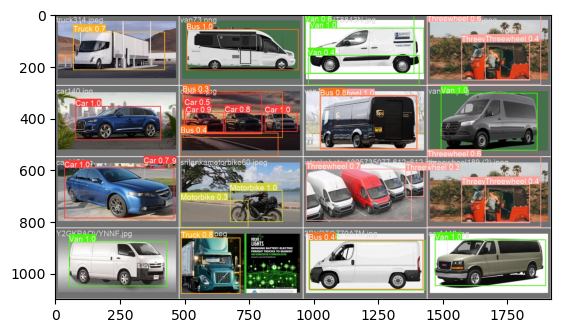

In [78]:
import cv2
example=cv2.imread('/kaggle/working/runs/detect/train2/val_batch1_pred.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)

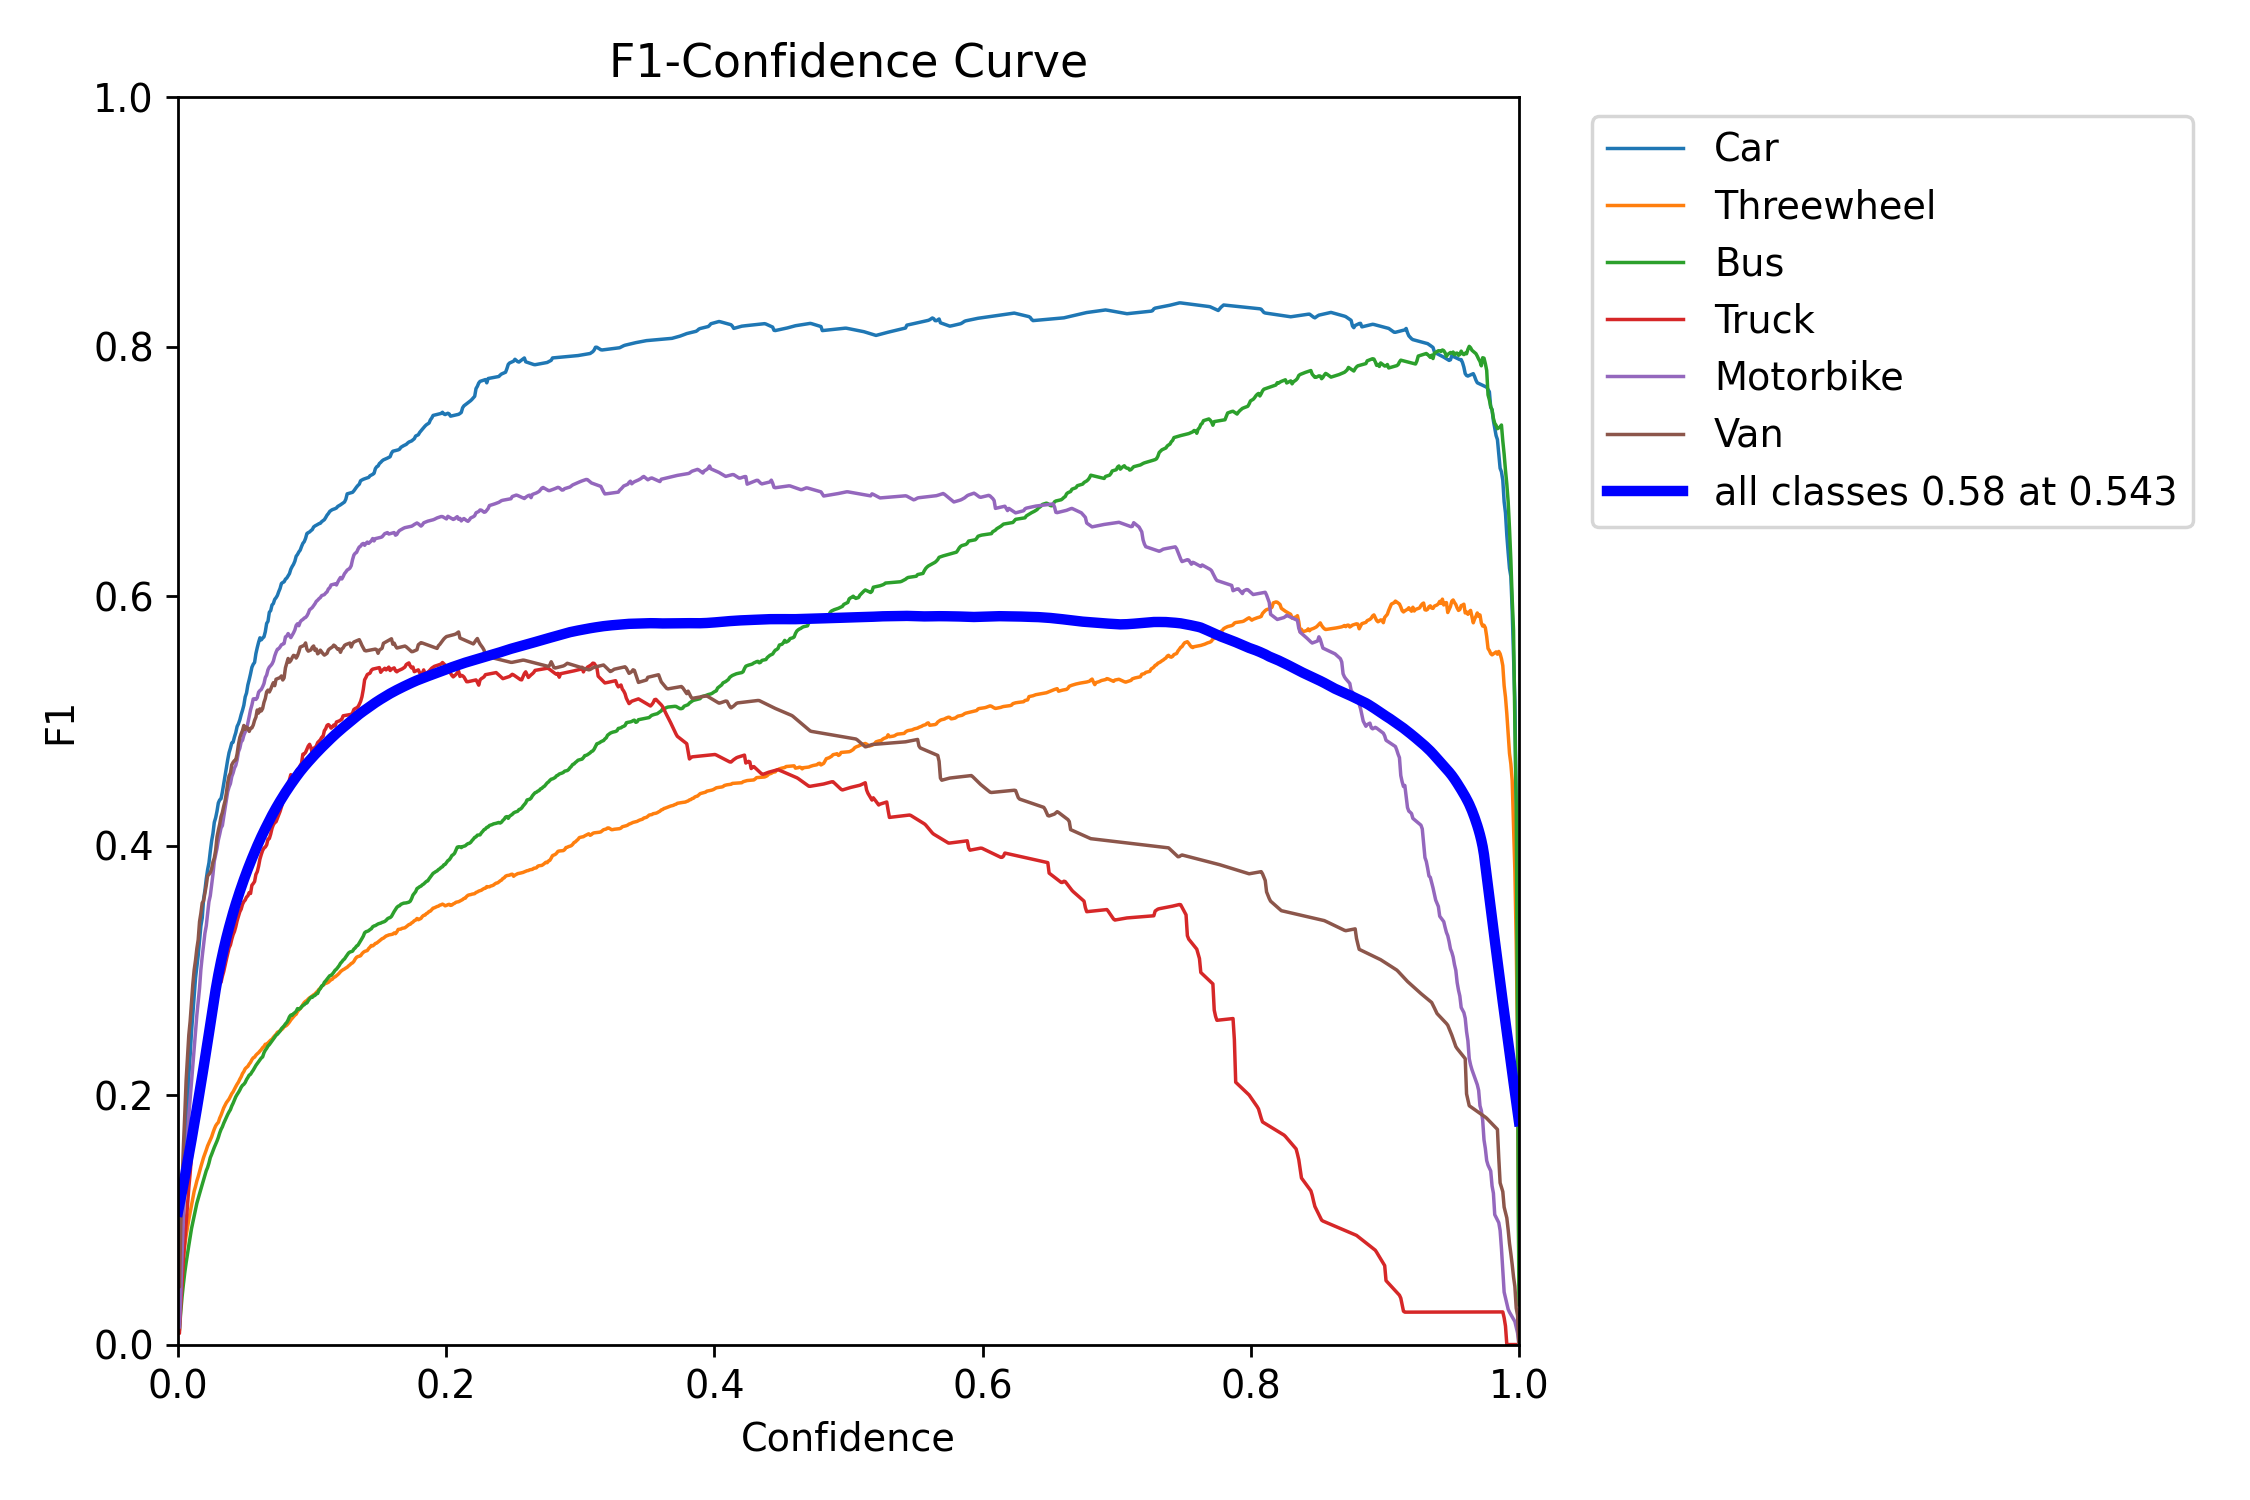

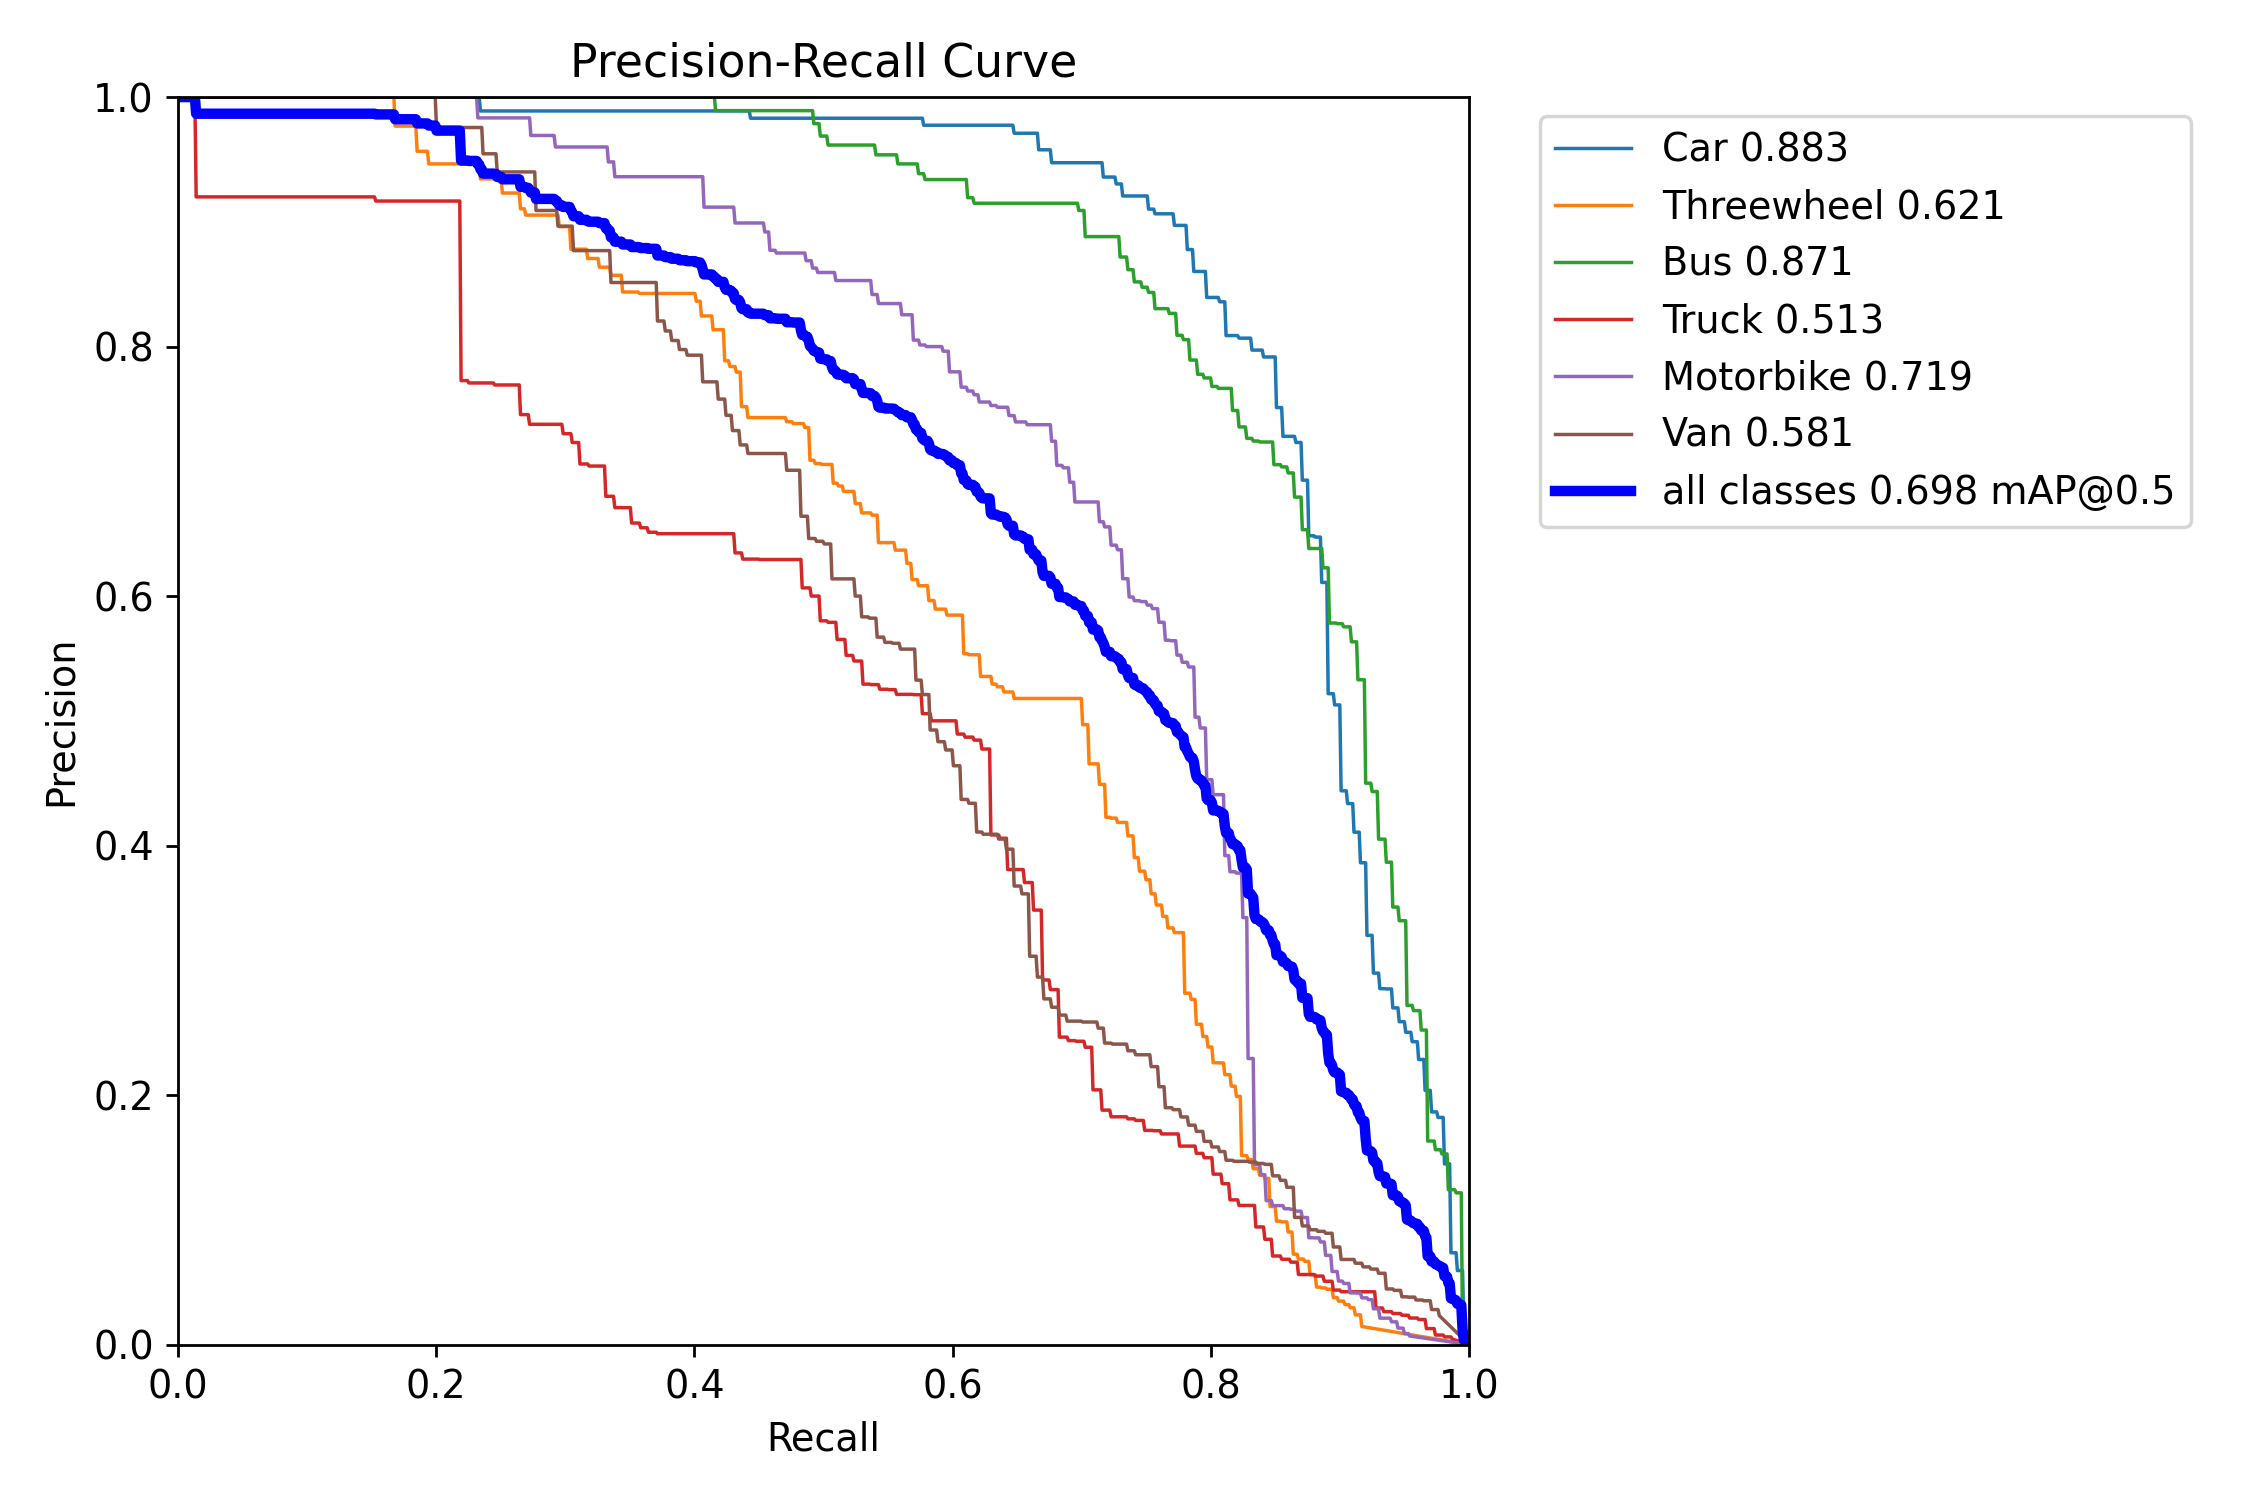

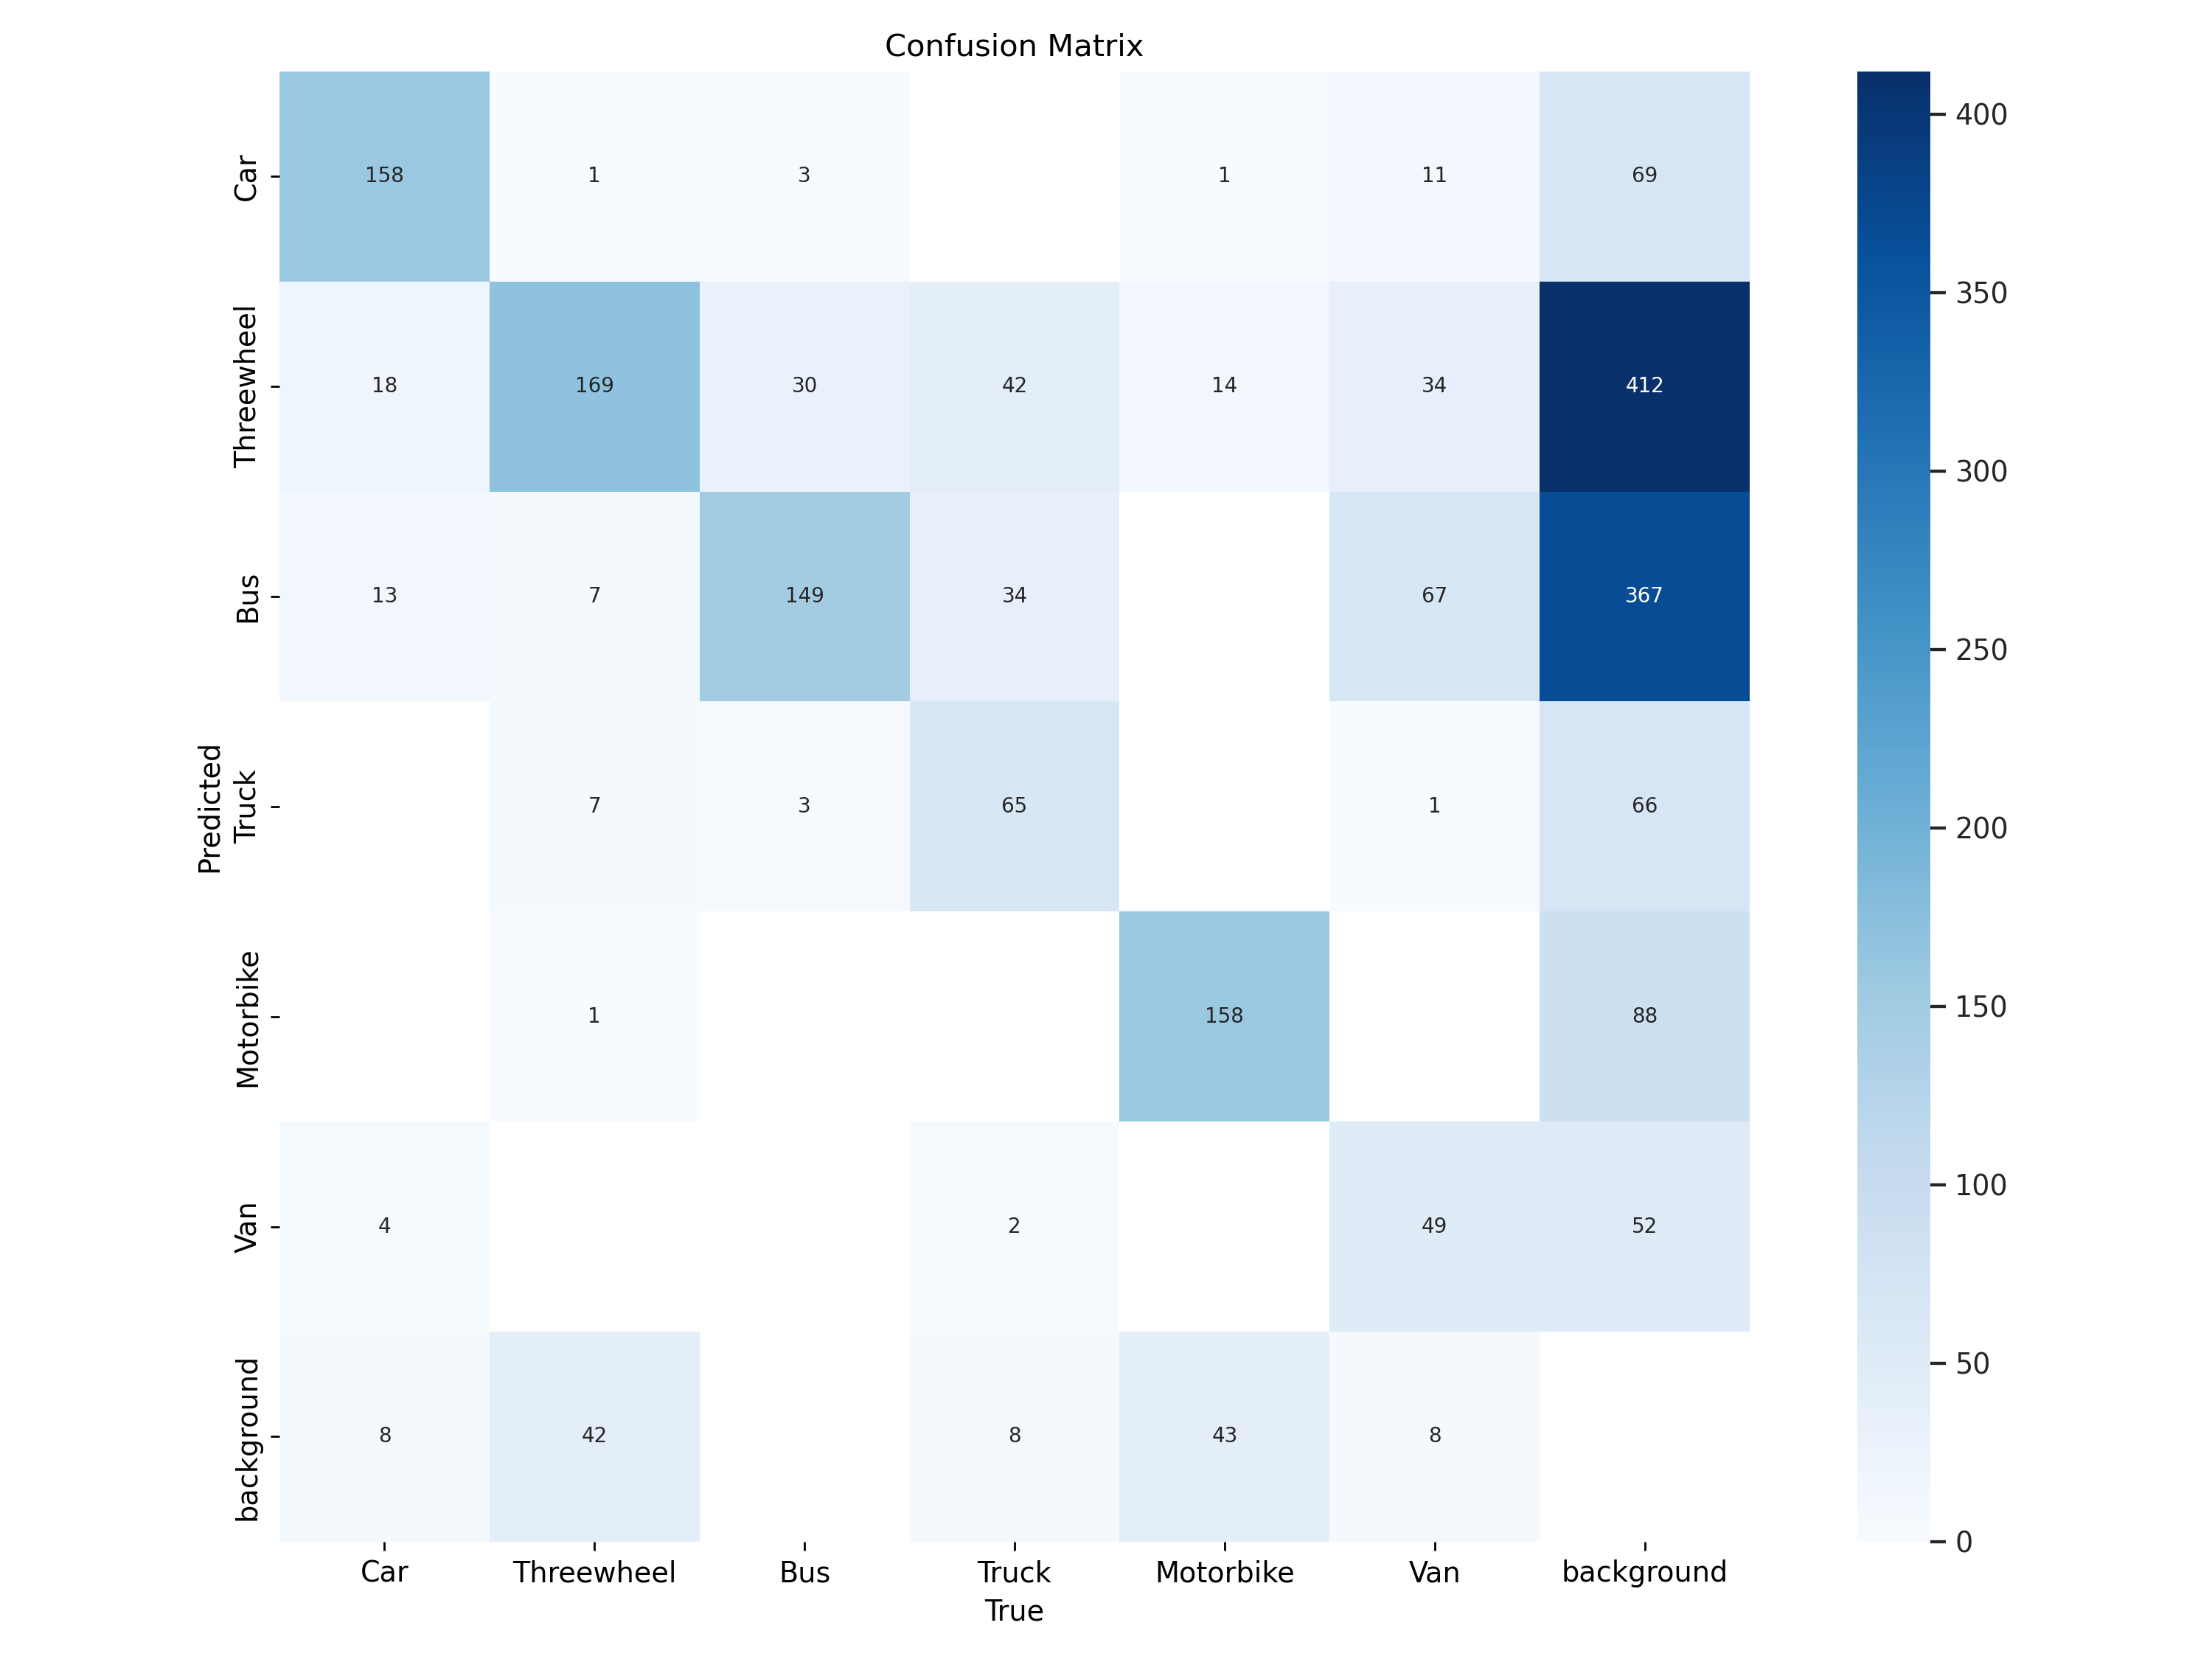

In [34]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train2/F1_curve.png') 
y = Image(filename='runs/detect/train2/PR_curve.png') 
z = Image(filename='runs/detect/train2/confusion_matrix.png') 
display(x, y,z)


In [35]:
!ls 'runs/detect/train2/weights'


best.pt  last.pt


In [36]:
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model

In [37]:
!yolo task=detect mode=predict model="runs/detect/train2/weights/best.pt" source="https://rr5---sn-qxaeenlk.googlevideo.com/videoplayback?expire=1690922928&ei=TxvJZKLFOZGVkgbphrLYBw&ip=191.96.37.37&id=o-AL43Lg7613i0HIQNqKZ5JhS1GlRwsYIQp7a8c0VK8ACp&itag=134&aitags=133%2C134%2C160%2C242%2C243%2C278%2C394%2C395%2C396&source=youtube&requiressl=yes&spc=Ul2SqxXL3BIhaGoGypmhvSDvF4l0MdaC3T0Tto70dg&vprv=1&svpuc=1&mime=video%2Fmp4&ns=a7gGcRRhDGn2sI_G-rkpUW8O&gir=yes&clen=2650922&dur=52.899&lmt=1668063756410391&keepalive=yes&fexp=24007246,24350017,51000022&beids=24350017&c=WEB&txp=5532434&n=QT88NNpT5K2McA&sparams=expire%2Cei%2Cip%2Cid%2Caitags%2Csource%2Crequiressl%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cns%2Cgir%2Cclen%2Cdur%2Clmt&sig=AOq0QJ8wRQIhAMZbYbvInIUFqauzX879wA03jjG9ZsVuGd9GVoPEWOoZAiBZbkykbtTul8lbjEUrBvmP5v3b45f2iewlSzHbhKipIg%3D%3D&rm=sn-q4feld7z&req_id=517ebaff94eba3ee&ipbypass=yes&redirect_counter=2&cm2rm=sn-xampgx-qxae7l&cms_redirect=yes&cmsv=e&mh=Rq&mip=175.111.182.119&mm=29&mn=sn-qxaeenlk&ms=rdu&mt=1690901098&mv=m&mvi=5&pl=26&lsparams=ipbypass,mh,mip,mm,mn,ms,mv,mvi,pl&lsig=AG3C_xAwRAIgdr-pYQuJBCv5Qmmpke67a6RfXpml6WJCLaeBnC2zo8ACICaLs3UeNHZCRItIRSjLS2WGJieX_J7GMs1DOIvxblRq"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [70]:
img_path = "https://img.freepik.com/premium-photo/blue-premium-business-sedan-car-sports-configuration-white-background-3d-rendering_101266-26564.jpg"

In [93]:
results = model.predict(img_path)
boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy
res_plotted = results[0].plot()


Found https://img.freepik.com/premium-photo/blue-premium-business-sedan-car-sports-configuration-white-background-3d-rendering_101266-26564.jpg locally at blue-premium-business-sedan-car-sports-configuration-white-background-3d-rendering_101266-26564.jpg
image 1/1 /kaggle/working/blue-premium-business-sedan-car-sports-configuration-white-background-3d-rendering_101266-26564.jpg: 384x640 1 car, 11.9ms
Speed: 6.7ms preprocess, 11.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


In [69]:
vid_path = 'https://rr1---sn-qxaelnek.googlevideo.com/videoplayback?expire=1690924879&ei=7yLJZOHBE-q10u8Px5uS-AM&ip=138.199.59.207&id=o-ADMeOcF80dyMVayOXSUFPvrmp1LIz-zPxFGgfGJH2Co7&itag=18&source=youtube&requiressl=yes&spc=Ul2Sq5XfHv2rkFJ-_vF1k5a_5badkQ4gpAn-mrpqkg&vprv=1&svpuc=1&mime=video%2Fmp4&ns=gEtkIZe8SB6ml4chgMlThTQO&cnr=14&ratebypass=yes&dur=52.964&lmt=1668063766248570&fexp=24007246,24350017,51000014,51000023&beids=24350017&c=WEB&txp=5538434&n=PKwcIWBLXQGFqg&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRQIgKqQJRPgr2GXWfcNyWrs0U4tefUsTZ5rhEVE0NCGO06ICIQDtkZbM_IZBfIiaqdJBxEZt0bZsaUncajOUMtWBaRPwMw%3D%3D&rm=sn-f5fel7z&req_id=3bc9382b226ca3ee&ipbypass=yes&redirect_counter=2&cm2rm=sn-xampgx-qxae7l&cms_redirect=yes&cmsv=e&mh=Rq&mip=175.111.182.119&mm=29&mn=sn-qxaelnek&ms=rdu&mt=1690902780&mv=m&mvi=1&pl=26&lsparams=ipbypass,mh,mip,mm,mn,ms,mv,mvi,pl&lsig=AG3C_xAwRgIhAJi7H1RleKVg_sk8pE5KyZK6pB0Oa9tQnDgXMo7GJlJrAiEAkFvp2vF2z6V-tL4IoAeOYlJ0QwEfLPx3ijjz3p8o4Ho%3D'
model.predict(vid_path, stream=True)

<generator object BasePredictor.stream_inference at 0x7f2006c88c80>

In [40]:
def remove_folder_contents(folder):
    for file in os.listdir(fazfolder):
        file_path = os.path.join(folder, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

remove_folder_contents('/kaggle/working')

In [76]:
model.export(format='onnx')

Ultralytics YOLOv8.0.145 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

ONNX: starting export with onnx 1.14.0 opset 17...


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 3.4s, saved as 'runs/detect/train2/weights/best.onnx' (98.8 MB)

Export complete (6.9s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=None 
Visualize:       https://netron.app


'runs/detect/train2/weights/best.onnx'